# **Prueba de significancia y regresión lineal**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Cargar primero la tabla en Archivos -> Subir al almacenamiento de la sesión
#Luego leer el archivo como dataframe de pandas
df=pd.read_excel("/content/hipotesis.xlsx")

In [ ]:
df.head()

,track_id,track_name_limpio,artist_s_name_limpio,artist_count,in_spotify_playlists,in_spotify_charts,streams_limpio,fecha_de_lanzamiento,in_apple_playlists,in_apple_charts,...,instrumentalness_quartile,instrumentalness_category,acousticness_quartile,acousticness_category,valence_quartile,valence_category,danceability_quartile,danceability_category,energy_quartile,energy_category
0,1406287,I Wanna Be Yours,Arctic Monkeys,1,12859,110,1297026226,2013-01-01,24,98,...,4,Alto,2,Bajo,2,Bajo,1,Bajo,1,Bajo
1,3921634,Blank Space,Taylor Swift,1,11434,53,1355959075,2014-01-01,154,123,...,4,Alto,2,Bajo,3,Bajo,3,Bajo,3,Bajo
2,4796316,Style,Taylor Swift,1,7830,42,786181836,2014-01-01,94,111,...,2,Bajo,1,Bajo,2,Bajo,2,Bajo,4,Alto
3,4527090,Yellow,Chris Molitor,1,31358,43,1755214421,1999-01-01,196,2,...,1,Bajo,1,Bajo,1,Bajo,1,Bajo,3,Bajo
4,3126367,Viva La Vida,Coldplay,1,33898,62,1592909789,2008-01-01,233,0,...,3,Bajo,2,Bajo,2,Bajo,1,Bajo,2,Bajo


##**Prueba de significancia**

Previo a la selección de la prueba estadística, observamos el histograma de la variable Streams para determinar su distribución (paramétrica o no paramétrica).

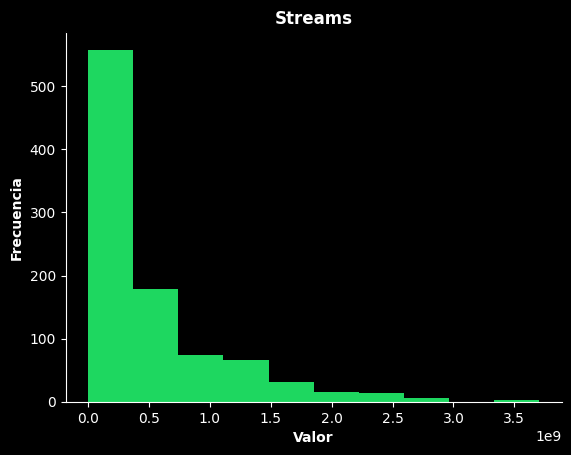

In [ ]:
#Histograma de la distribución de streams
plt.figure(facecolor='black') #Cambiar el color del área del gráfico (outer)
ax = plt.axes()
ax.set_facecolor("black") #Cambiar el color del área del gráfico (inner)
ax.spines['bottom'].set_color('white') #Cambiar el color de las líneas de los ejes
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white') #Cambiar el color de las marcas en los ejes
ax.tick_params(axis='y', colors='white')
plt.hist(df['streams_limpio'], bins=10, color='#1ED760')
plt.xlabel('Valor', color='white', fontweight='bold')
plt.xticks(color='white')
plt.ylabel('Frecuencia', color='white', fontweight='bold')
plt.yticks(color='white')
plt.title('Streams', color='white', fontweight='bold')
plt.show()

La variable de Streams no sigue una distribución paramétrica (normal o Gaussiana), por lo que decidimos realizar el test de Wilcoxon (Mann-Whitney U).

### Test de Wilcoxon (Mann-Whitney U)

In [ ]:
#Variables de las canciones para comparar
features=['danceability_category', 'valence_category', 'energy_category', 'acousticness_category',
          'instrumentalness_category', 'liveness_category', 'speechiness_category', 'bpm_category']

#Valor de significancia
alpha = 0.05

In [ ]:
for feature in features:
  group_alto = df[df[feature]=='Alto']['streams_limpio']
  group_bajo = df[df[feature]=='Bajo']['streams_limpio']

  stat, p_value = mannwhitneyu(group_alto, group_bajo)

  print(f"Para {feature}:")
  print(f"Mann-Whitney: {stat}")
  print(f"p-value: {p_value}")

  if p_value < alpha:
    print("La diferencia es significativa.")
  else:
    print("La diferencia no es significativa.")

Para danceability_category:
Mann-Whitney: 76134.0
p-value: 0.03298021256391596
La diferencia es significativa.
Para valence_category:
Mann-Whitney: 80160.5
p-value: 0.3047007266858741
La diferencia no es significativa.
Para energy_category:
Mann-Whitney: 81129.0
p-value: 0.4470175355105044
La diferencia no es significativa.
Para acousticness_category:
Mann-Whitney: 82094.0
p-value: 0.6203533750535342
La diferencia no es significativa.
Para instrumentalness_category:
Mann-Whitney: 83471.5
p-value: 0.9068559129472302
La diferencia no es significativa.
Para liveness_category:
Mann-Whitney: 80075.0
p-value: 0.293769410029607
La diferencia no es significativa.
Para speechiness_category:
Mann-Whitney: 74779.0
p-value: 0.01226285563291932
La diferencia es significativa.
Para bpm_category:
Mann-Whitney: 86767.0
p-value: 0.43077705157319945
La diferencia no es significativa.


A partir de los resultados de la prueba, las únicas dos características que tienen una diferencia significativa en el promedio de streams por grupo (alto y bajo) son danceability y speechiness.

### **Tabla resumen**

In [ ]:
resultado_df = pd.DataFrame(columns=['Caracteristica', 'Categoria', 'Conteo', 'Promedio_Streams', 'Mediana', 'Max_Streams', 'Min_Streams'])

for feature in features:
  for categoria in ['Alto', 'Bajo']:
    #Filtrar el dataframe por caracteristica y categoria
    subset = df[df[feature]==categoria]

    conteo = len(subset)
    promedio_streams = subset['streams_limpio'].mean()
    mediana = subset['streams_limpio'].median()
    desviacion_estandar = subset['streams_limpio'].std()
    max_streams = subset['streams_limpio'].max()
    min_streams = subset['streams_limpio'].min()

    #Agregar los resultados al resultado_df
    resultado_df = resultado_df.append({
        'Caracteristica': feature,
        'Categoria': categoria,
        'Conteo': conteo,
        'Promedio_Streams': promedio_streams,
        'Mediana': mediana,
        'Max_Streams': max_streams,
        'Min_Streams': min_streams
    }, ignore_index=True)

resultado_df

,Caracteristica,Categoria,Conteo,Promedio_Streams,Mediana,Max_Streams,Min_Streams
0,danceability_category,Alto,236,4.324738e+08,251081344.5,3562543890,1365184
1,danceability_category,Bajo,711,5.417745e+08,303236322.0,3703895074,2762
2,valence_category,Alto,236,4.725445e+08,261350338.5,3562543890,2762
3,valence_category,Bajo,711,5.284739e+08,298063749.0,3703895074,1365184
4,energy_category,Alto,236,5.057633e+08,266086689.0,3703895074,11599388
5,energy_category,Bajo,711,5.174477e+08,295152154.0,3562543890,2762
6,acousticness_category,Alto,236,5.383811e+08,284120288.5,3562543890,16011326
7,acousticness_category,Bajo,711,5.066210e+08,293466523.0,3703895074,2762
8,instrumentalness_category,Alto,236,4.677267e+08,293769568.0,3562543890,30546883
9,instrumentalness_category,Bajo,711,5.300730e+08,284908316.0,3703895074,2762


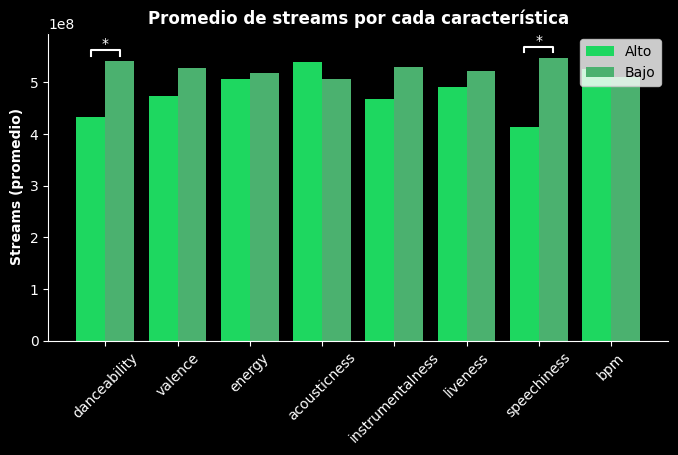

In [ ]:
#Gráfico de barras con la comparación de los promedios por variable y por categoría
alto = resultado_df[resultado_df['Categoria']=='Alto']['Promedio_Streams']
bajo = resultado_df[resultado_df['Categoria']=='Bajo']['Promedio_Streams']
caracteristicas=['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'bpm']

plt.figure(facecolor='black', figsize=(8,4))

ax = plt.axes()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor("black")

X_axis = np.arange(len(features))

plt.bar(X_axis - 0.2, alto, 0.4, label = 'Alto', color='#1ED760')
plt.bar(X_axis + 0.2, bajo, 0.4, label = 'Bajo', color='#4bb16f')

plt.xticks(X_axis, features, color='white')
#plt.xlabel("Características")
plt.ylabel("Streams (promedio)", color='white', fontweight='bold')
plt.yticks(color='white')
plt.title("Promedio de streams por cada característica", color='white', fontweight='bold')
plt.legend(loc='upper right')
plt.xticks(ticks=X_axis, labels=caracteristicas, rotation=45, color='white')

y1 = resultado_df[resultado_df['Categoria']=='Bajo'][resultado_df['Caracteristica']=='danceability_category']['Promedio_Streams'] + 10000000
y2 = resultado_df[resultado_df['Categoria']=='Bajo'][resultado_df['Caracteristica']=='speechiness_category']['Promedio_Streams'] + 10000000

plt.plot([X_axis[0]-0.2, X_axis[0]-0.2, X_axis[0]+0.2 , X_axis[0]+0.2], [y1, y1+10000000, y1+10000000, y1], lw=1.5, c='white')
plt.plot([X_axis[6]-0.2, X_axis[6]-0.2, X_axis[6]+0.2 , X_axis[6]+0.2], [y2, y2+10000000, y2+10000000, y2], lw=1.5, c='white')
plt.text(X_axis[0], y1+10000000, "*", ha='center', va='bottom', color='white')
plt.text(X_axis[6], y2+10000000, "*", ha='center', va='bottom', color='white')
plt.show()

## **Regresión lineal**

Exploramos dos formas de hacer las regresiones lineales, mediante la librería de sklearn y la de scipy.

**BPM y Streams**

In [ ]:
bpm = df['bpm']
streams = df['streams_limpio']

In [ ]:
bpm_train, bpm_test, streams_train1, streams_test1 = train_test_split(bpm, streams, test_size=0.2)
lr = linear_model.LinearRegression()
lr.fit(np.array(bpm_train).reshape(-1, 1), np.array(streams_train1).reshape(-1, 1))
y_pred = lr.predict(np.array(bpm_test).reshape(-1, 1))

La correlación entre las dos variables es: -0.0023362035865172217


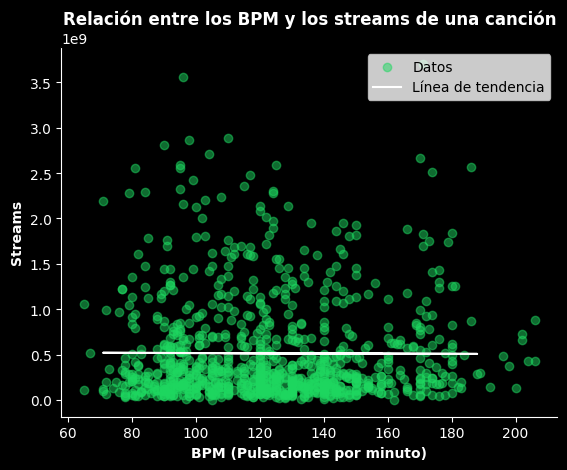

In [ ]:
corr_bpm_streams = bpm.corr(streams)
print(f'La correlación entre las dos variables es: {corr_bpm_streams}')

plt.figure(facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor("black")

plt.scatter(bpm, streams, color='#1ED760', alpha=0.5, label='Datos')
plt.xlabel("BPM (Pulsaciones por minuto)", color='white', fontweight='bold')
plt.ylabel("Streams", color='white', fontweight='bold')
plt.title("Relación entre los BPM y los streams de una canción", color='white', fontweight='bold')
plt.plot(bpm_test, y_pred, color='white', label='Línea de tendencia')
plt.legend(loc='upper right')
plt.show()

**Presencia total en playlists y Streams**

In [ ]:
total_playlists = df['playlists_total']

In [ ]:
playlists_train, playlists_test, streams_train2, streams_test2 = train_test_split(total_playlists, streams, test_size=0.2)
lr2 = linear_model.LinearRegression()
lr2.fit(np.array(playlists_train).reshape(-1, 1), np.array(streams_train2).reshape(-1, 1))
y_pred2 = lr2.predict(np.array(playlists_test).reshape(-1, 1))

La correlación entre las dos variables es: 0.7835685699510719


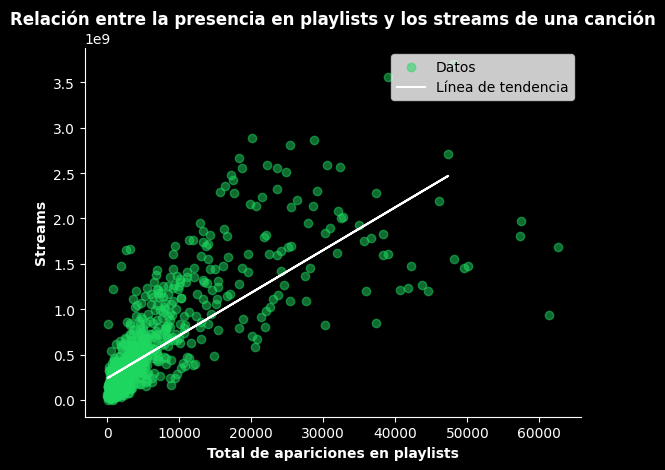

In [ ]:
corr_playlists_streams = total_playlists.corr(streams)
print(f'La correlación entre las dos variables es: {corr_playlists_streams}')

plt.figure(facecolor='black')
ax = plt.axes()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor("black")

plt.scatter(total_playlists, streams, color='#1ED760', alpha=0.5, label='Datos')
plt.xlabel("Total de apariciones en playlists", color='white', fontweight='bold')
plt.ylabel("Streams", color='white', fontweight='bold')
plt.title("Relación entre la presencia en playlists y los streams de una canción", color='white', fontweight='bold')
plt.plot(playlists_test, y_pred2, color='white', label='Línea de tendencia')
plt.legend(loc='upper right')
plt.show()

**Relación entre charts en Spotify y charts en Apple**

La correlación entre las dos variables es: 0.551556483192113
R^2: 0.3042145541512511
MSE: 1782.5032895204943
MAE: 33.958591830363375


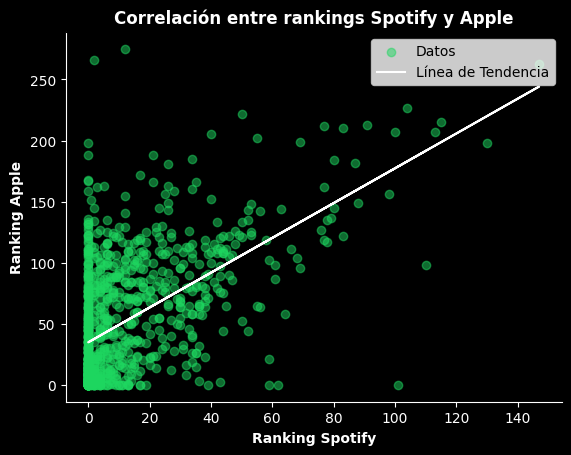

In [ ]:
spotify_charts = df['in_spotify_charts']
apple_charts = df['in_apple_charts']
correlacion = spotify_charts.corr(apple_charts)
print(f'La correlación entre las dos variables es: {correlacion}')
slope, intercept, r_value, p_value, std_err = linregress(spotify_charts, apple_charts)
line = slope * spotify_charts + intercept
r_squared = r2_score(apple_charts, line)
mse = mean_squared_error(apple_charts, line)
mae = mean_absolute_error(apple_charts, line)
print(f'R^2: {r_squared}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

plt.figure(facecolor='black')
ax = plt.axes()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor("black")
plt.scatter(spotify_charts, apple_charts, color='#1ED760', alpha=0.5, label='Datos')
plt.plot(spotify_charts, line, color='white', label='Línea de Tendencia')
plt.title('Correlación entre rankings Spotify y Apple', color='white', fontweight='bold')
plt.xlabel('Ranking Spotify', color='white', fontweight='bold')
plt.ylabel('Ranking Apple', color='white', fontweight='bold')
plt.legend(loc='upper right')
plt.show()

**Relación entre charts en Spotify y charts en Deezer**

La correlación entre las dos variables es: 0.599986055348093
R^2: 0.35998326661216473
MSE: 23.254988728121422
MAE: 2.5458580612581345


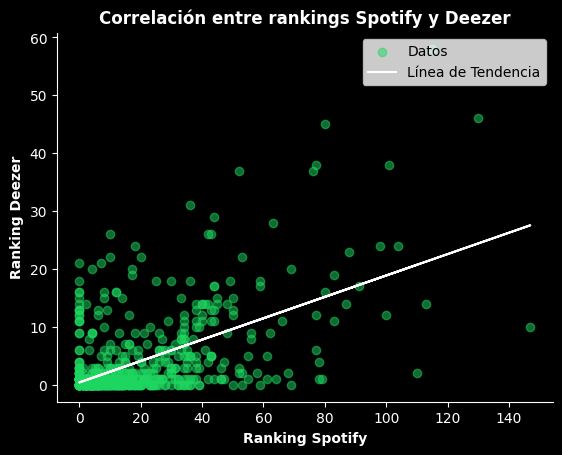

In [ ]:
spotify_charts = df['in_spotify_charts']
deezer_charts = df['in_deezer_charts']
correlacion2 = spotify_charts.corr(deezer_charts)
print(f'La correlación entre las dos variables es: {correlacion2}')
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(spotify_charts, deezer_charts)
line2 = slope2 * spotify_charts + intercept2
r_squared2 = r2_score(deezer_charts, line2)
mse2 = mean_squared_error(deezer_charts, line2)
mae2 = mean_absolute_error(deezer_charts, line2)
print(f'R^2: {r_squared2}')
print(f'MSE: {mse2}')
print(f'MAE: {mae2}')

plt.figure(facecolor='black')
ax = plt.axes()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor("black")
plt.scatter(spotify_charts, deezer_charts, color='#1ED760', alpha=0.5, label='Datos')
plt.plot(spotify_charts, line2, color='white', label='Línea de Tendencia')
plt.title('Correlación entre rankings Spotify y Deezer', color='white', fontweight='bold')
plt.xlabel('Ranking Spotify', color='white', fontweight='bold')
plt.ylabel('Ranking Deezer', color='white', fontweight='bold')
plt.legend(loc='upper right')
plt.show()